In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore');

In [3]:
all_data = pd.read_csv('./only_frankfurt.csv', delimiter=',')

In [4]:
all_data.head()

,Unnamed: 0,BOOKING_HAL_ID,EFFECTIVE_CATEGORY_HAL_ID,VEHICLE_HAL_ID,VEHICLE_HAL_SRC,RENTAL_OBJECT_HAL_ID,RENTAL_OBJECT_HAL_SRC,VEHICLE_COMPANY_HAL_ID,DUTY_TRIP_X,CUSTOMER_HAL_ID,...,FRAME_BOOKING_HAL_ID,START_RENTAL_ZONE,START_RENTAL_ZONE_GROUP,END_RENTAL_ZONE,END_RENTAL_ZONE_GROUP,CITY_RENTAL_ZONE,ACTUAL_VEHICLE_CATEGORY,BOOKING_LENGTH_CLASSIFICATION,TECHNICAL_USER_NAME,TECHNICAL_USER_NAME_LONG
0,0,23161966,50000,116335,cab_fahrrad,363130,autopos,500,1,AABCDA9CD1FDDD1A819B2C68F6F05C678EC9E918,...,NaN,Pfarrer-Perabo-Platz / Kleyerstraße,Pfarrer-Perabo-Platz / Kleyerstraße,NaN,NaN,Frankfurt am Main,Fahrrad,4) 60 bis 120 Minuten,NaN,NaN
1,3,23162025,50000,116424,cab_fahrrad,381903,autopos,500,1,AABCDA9CD1FDDD1A819B2C68F6F05C678EC9E918,...,NaN,Industriehof,Industriehof,NaN,NaN,Frankfurt am Main,Fahrrad,5) 120 bis 180 Minuten,NaN,NaN
2,16,22624449,50000,116493,cab_fahrrad,384528,autopos,500,0,DF380E61BFD8496818D355402053EB10476304CF,...,NaN,NaN,NaN,Nibelungenplatz / Nibelungen Allee,Nibelungenplatz / Nibelungen Allee,Frankfurt am Main,Fahrrad,5) 120 bis 180 Minuten,NaN,NaN
3,28,23161904,50000,117262,cab_fahrrad,397394,autopos,500,0,30848C833E874239FF088C39A527558B3DBDE2E8,...,NaN,Europaallee / Den Haager Straße,Europaallee / Den Haager Straße,NaN,NaN,Frankfurt am Main,Fahrrad,1) 0 bis 15 Minuten,t,IVR
4,34,23161562,50000,116188,cab_fahrrad,393546,autopos,500,0,B9951AE1E818A5215F08307C179FF16CF984757B,...,NaN,Frankenallee / Schwalbacherstraße,Frankenallee / Schwalbacherstraße,Voltastraße / An der Dammheide,Voltastraße / An der Dammheide,Frankfurt am Main,Fahrrad,1) 0 bis 15 Minuten,Schnittstelle,iPhone CAB


In [5]:
twocols = all_data[['BOOKING_HAL_ID', 'DATE_BOOKING']]

In [6]:
twocols.head()

,BOOKING_HAL_ID,DATE_BOOKING
0,23161966,2014-05-13 09:04:25.0000000
1,23162025,2014-05-13 09:06:26.0000000
2,22624449,2014-04-13 14:51:52.0000000
3,23161904,2014-05-13 09:01:53.0000000
4,23161562,2014-05-13 08:49:22.0000000


In [7]:
newcols = pd.DataFrame(twocols["DATE_BOOKING"].str.split(" ", 1).tolist(), columns = ['date','time'])

In [8]:
newcols.head()

,date,time
0,2014-05-13,09:04:25.0000000
1,2014-05-13,09:06:26.0000000
2,2014-04-13,14:51:52.0000000
3,2014-05-13,09:01:53.0000000
4,2014-05-13,08:49:22.0000000


In [9]:
splitted_date = pd.DataFrame(newcols["date"].str.split("-", 2).tolist(), columns = ['year', 'month', 'day'])
## cut the date in certain features

In [10]:
splitted_date.head()

,year,month,day
0,2014,05,13
1,2014,05,13
2,2014,04,13
3,2014,05,13
4,2014,05,13


Text(0.5, 1.0, 'Booking_Number_per_Month')

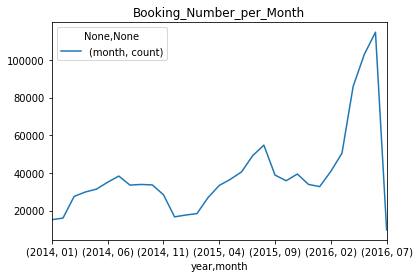

In [11]:
splitted_date.groupby(['year', 'month']).agg({'month': ['count']}).plot()
plt.title('Booking_Number_per_Month')
##shows number of bookings per month

Text(0.5, 1.0, 'Booking_Number_per_Year')

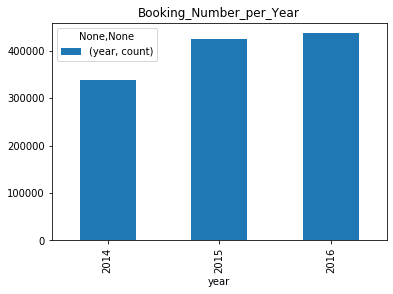

In [12]:
splitted_date.groupby(['year']).agg({'year': ['count']}).plot(kind='bar')
plt.title('Booking_Number_per_Year')
##shows number of bookings per year

In [13]:
Booking_Length = all_data[['BOOKING_HAL_ID', 'DATE_BOOKING', 'DATE_FROM', 'DATE_UNTIL', 'BOOKING_LENGTH_CLASSIFICATION']]

In [14]:
Booking_Length.head()
#another dataset from all with selected features

,BOOKING_HAL_ID,DATE_BOOKING,DATE_FROM,DATE_UNTIL,BOOKING_LENGTH_CLASSIFICATION
0,23161966,2014-05-13 09:04:25.0000000,2014-05-13 09:04:25.0000000,2014-05-13 10:34:52.0000000,4) 60 bis 120 Minuten
1,23162025,2014-05-13 09:06:26.0000000,2014-05-13 09:06:26.0000000,2014-05-13 11:58:02.0000000,5) 120 bis 180 Minuten
2,22624449,2014-04-13 14:51:52.0000000,2014-04-13 14:51:52.0000000,2014-04-13 17:38:50.0000000,5) 120 bis 180 Minuten
3,23161904,2014-05-13 09:01:53.0000000,2014-05-13 09:01:53.0000000,2014-05-13 09:02:28.0000000,1) 0 bis 15 Minuten
4,23161562,2014-05-13 08:49:22.0000000,2014-05-13 08:49:22.0000000,2014-05-13 08:58:00.0000000,1) 0 bis 15 Minuten


In [15]:
Booking_Length['DATE_BOOKING'] = pd.DataFrame(Booking_Length["DATE_BOOKING"].str.split(" ", 1).tolist(), columns = ['date', 'time'])
Booking_Length.head()
#cut Booking time from Date_Booking by splitting the attribute


,BOOKING_HAL_ID,DATE_BOOKING,DATE_FROM,DATE_UNTIL,BOOKING_LENGTH_CLASSIFICATION
0,23161966,2014-05-13,2014-05-13 09:04:25.0000000,2014-05-13 10:34:52.0000000,4) 60 bis 120 Minuten
1,23162025,2014-05-13,2014-05-13 09:06:26.0000000,2014-05-13 11:58:02.0000000,5) 120 bis 180 Minuten
2,22624449,2014-04-13,2014-04-13 14:51:52.0000000,2014-04-13 17:38:50.0000000,5) 120 bis 180 Minuten
3,23161904,2014-05-13,2014-05-13 09:01:53.0000000,2014-05-13 09:02:28.0000000,1) 0 bis 15 Minuten
4,23161562,2014-05-13,2014-05-13 08:49:22.0000000,2014-05-13 08:58:00.0000000,1) 0 bis 15 Minuten


In [16]:
Booking_Length['DATE_FROM'] = pd.to_datetime(Booking_Length['DATE_FROM']) 
Booking_Length['DATE_UNTIL'] = pd.to_datetime(Booking_Length['DATE_UNTIL'])
Booking_Length['BOOKING_TIME'] = Booking_Length['DATE_UNTIL'] - Booking_Length['DATE_FROM']
Booking_Length.head()
#create new column and add it to dataset with the absolute Bookingtime

,BOOKING_HAL_ID,DATE_BOOKING,DATE_FROM,DATE_UNTIL,BOOKING_LENGTH_CLASSIFICATION,BOOKING_TIME
0,23161966,2014-05-13,2014-05-13 09:04:25,2014-05-13 10:34:52,4) 60 bis 120 Minuten,01:30:27
1,23162025,2014-05-13,2014-05-13 09:06:26,2014-05-13 11:58:02,5) 120 bis 180 Minuten,02:51:36
2,22624449,2014-04-13,2014-04-13 14:51:52,2014-04-13 17:38:50,5) 120 bis 180 Minuten,02:46:58
3,23161904,2014-05-13,2014-05-13 09:01:53,2014-05-13 09:02:28,1) 0 bis 15 Minuten,00:00:35
4,23161562,2014-05-13,2014-05-13 08:49:22,2014-05-13 08:58:00,1) 0 bis 15 Minuten,00:08:38


In [17]:
date_split = pd.DataFrame(Booking_Length["DATE_BOOKING"].str.split("-",2).tolist(), columns = ['year','month', 'day'])
Booking_Length['BOOKING_YEAR'] = date_split['year']
Booking_Length['BOOKING_MONTH'] = date_split['month']
#create new columns by splitting datebooking and caching in date_split

In [18]:
Booking_Length.head()

,BOOKING_HAL_ID,DATE_BOOKING,DATE_FROM,DATE_UNTIL,BOOKING_LENGTH_CLASSIFICATION,BOOKING_TIME,BOOKING_YEAR,BOOKING_MONTH
0,23161966,2014-05-13,2014-05-13 09:04:25,2014-05-13 10:34:52,4) 60 bis 120 Minuten,01:30:27,2014,05
1,23162025,2014-05-13,2014-05-13 09:06:26,2014-05-13 11:58:02,5) 120 bis 180 Minuten,02:51:36,2014,05
2,22624449,2014-04-13,2014-04-13 14:51:52,2014-04-13 17:38:50,5) 120 bis 180 Minuten,02:46:58,2014,04
3,23161904,2014-05-13,2014-05-13 09:01:53,2014-05-13 09:02:28,1) 0 bis 15 Minuten,00:00:35,2014,05
4,23161562,2014-05-13,2014-05-13 08:49:22,2014-05-13 08:58:00,1) 0 bis 15 Minuten,00:08:38,2014,05


Text(0.5, 1.0, 'Summarized_Booking_Time_per_month')

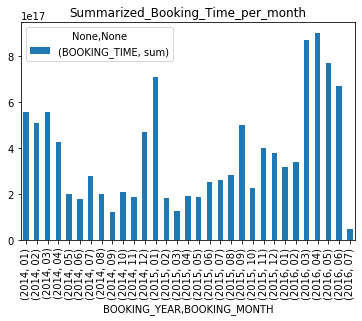

In [19]:
Booking_Length.groupby(['BOOKING_YEAR','BOOKING_MONTH']).agg({'BOOKING_TIME': ['sum']}).plot(kind='bar')
plt.title('Summarized_Booking_Time_per_month')

Text(0.5, 1.0, 'Average_Booking_Time_per_Month')

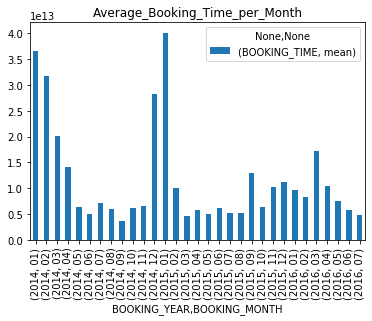

In [20]:
Booking_Length['BOOKING_TIME'] = Booking_Length['BOOKING_TIME'].values.astype(np.int64)
Booking_Length.groupby(['BOOKING_YEAR','BOOKING_MONTH']).agg({'BOOKING_TIME': ['mean']}).plot(kind='bar')
plt.title('Average_Booking_Time_per_Month')

Text(0.5, 1.0, 'Booking_Time_divided_in_Timeseries')

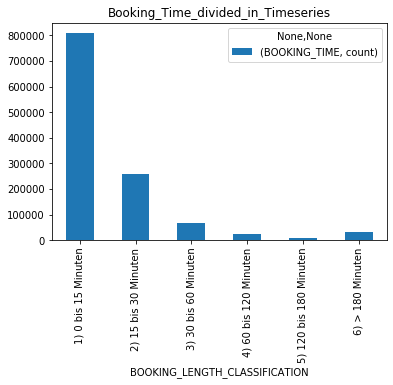

In [21]:
Booking_Length.groupby(['BOOKING_LENGTH_CLASSIFICATION']).agg({'BOOKING_TIME': ['count']}).plot(kind='bar')
plt.title('Booking_Time_divided_in_Timeseries')
#Bookingtimes for each BookingEntity is assigned to certain Timeseries 

In [22]:
Booking_Length['DATE_BOOKING'] = pd.DataFrame(Booking_Length["DATE_BOOKING"].str.split("-", 2).tolist(), columns = ['date', 'time', 'day'])
Booking_Length.head()

,BOOKING_HAL_ID,DATE_BOOKING,DATE_FROM,DATE_UNTIL,BOOKING_LENGTH_CLASSIFICATION,BOOKING_TIME,BOOKING_YEAR,BOOKING_MONTH
0,23161966,2014,2014-05-13 09:04:25,2014-05-13 10:34:52,4) 60 bis 120 Minuten,5427000000000,2014,05
1,23162025,2014,2014-05-13 09:06:26,2014-05-13 11:58:02,5) 120 bis 180 Minuten,10296000000000,2014,05
2,22624449,2014,2014-04-13 14:51:52,2014-04-13 17:38:50,5) 120 bis 180 Minuten,10018000000000,2014,04
3,23161904,2014,2014-05-13 09:01:53,2014-05-13 09:02:28,1) 0 bis 15 Minuten,35000000000,2014,05
4,23161562,2014,2014-05-13 08:49:22,2014-05-13 08:58:00,1) 0 bis 15 Minuten,518000000000,2014,05


Text(0.5, 1.0, 'Absolut_Booking_Time_per_Year')

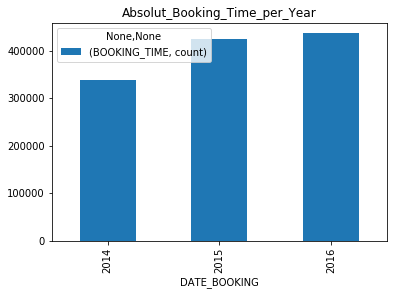

In [23]:
Booking_Length.groupby(['DATE_BOOKING']).agg({'BOOKING_TIME': ['count']}).plot(kind='bar')
plt.title('Absolut_Booking_Time_per_Year')

In [24]:
Booking_Length['DATE_FROM'] = pd.to_datetime(Booking_Length['DATE_FROM']) 
Booking_Length['DATE_BOOKING'] = pd.to_datetime(Booking_Length['DATE_BOOKING'])
Booking_Length['BOOKING_Month'] = Booking_Length['DATE_FROM'] - Booking_Length['DATE_BOOKING']
Booking_Length.head()
# nicht berücksichtigen!

,BOOKING_HAL_ID,DATE_BOOKING,DATE_FROM,DATE_UNTIL,BOOKING_LENGTH_CLASSIFICATION,BOOKING_TIME,BOOKING_YEAR,BOOKING_MONTH,BOOKING_Month
0,23161966,2014-01-01,2014-05-13 09:04:25,2014-05-13 10:34:52,4) 60 bis 120 Minuten,5427000000000,2014,05,132 days 09:04:25
1,23162025,2014-01-01,2014-05-13 09:06:26,2014-05-13 11:58:02,5) 120 bis 180 Minuten,10296000000000,2014,05,132 days 09:06:26
2,22624449,2014-01-01,2014-04-13 14:51:52,2014-04-13 17:38:50,5) 120 bis 180 Minuten,10018000000000,2014,04,102 days 14:51:52
3,23161904,2014-01-01,2014-05-13 09:01:53,2014-05-13 09:02:28,1) 0 bis 15 Minuten,35000000000,2014,05,132 days 09:01:53
4,23161562,2014-01-01,2014-05-13 08:49:22,2014-05-13 08:58:00,1) 0 bis 15 Minuten,518000000000,2014,05,132 days 08:49:22


In [25]:
rentalzone = all_data[['START_RENTAL_ZONE', 'END_RENTAL_ZONE']]

In [26]:
rentalzone.head()

,START_RENTAL_ZONE,END_RENTAL_ZONE
0,Pfarrer-Perabo-Platz / Kleyerstraße,NaN
1,Industriehof,NaN
2,NaN,Nibelungenplatz / Nibelungen Allee
3,Europaallee / Den Haager Straße,NaN
4,Frankenallee / Schwalbacherstraße,Voltastraße / An der Dammheide


In [27]:
rentalzone.groupby(rentalzone['START_RENTAL_ZONE'].dt.weekday_name).size()
#ax = rentalzone.plot.scatter

AttributeError: Can only use .dt accessor with datetimelike values

AttributeError: 'AxesSubplot' object has no attribute 'head'

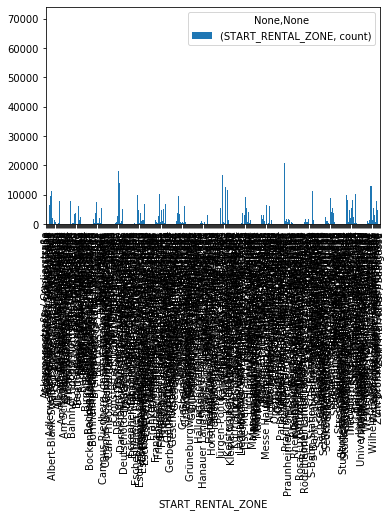

In [28]:
rentalzone.groupby(['START_RENTAL_ZONE']).agg({'START_RENTAL_ZONE': ['count']}).plot(kind='bar').head()
#Which Rental Zone is used most often?

In [66]:
availbility_data = pd.read_csv('./HACKATHON_AVAILABILITY_CALL_A_BIKE.csv', delimiter=';')

In [67]:
availbility_data.head()

,DAY_ID,DATE_DAY,VEHICLE_HAL_ID,VEHICLE_HAL_SRC,COMPANY_HAL_ID,RENTAL_ZONE_HAL_ID,RENTAL_ZONE_HAL_SRC,RENTAL_POOL_HAL_ID,VEHICLE_COUNT,AVAILABILITY,...,AVAILABILITY17,AVAILABILITY18,AVAILABILITY19,AVAILABILITY20,AVAILABILITY21,AVAILABILITY22,AVAILABILITY23,CATEGORY_HAL_ID,COMPANY,COMPANY_GROUP
0,16072,2014-01-01 00:00:00.0000000,110205,cab_fahrrad,500,400412,Station,NaN,"1,0",86400,...,3600,3600,3600,3600,3600,3600,3600,50000,Call a Bike,Call a Bike
1,16072,2014-01-01 00:00:00.0000000,110205,cab_fahrrad,500,400412,Station,NaN,"1,0",86400,...,3600,3600,3600,3600,3600,3600,3600,50000,Call a Bike,Call a Bike
2,16072,2014-01-01 00:00:00.0000000,119248,cab_fahrrad,500,401271,Station,NaN,"1,0",86400,...,3600,3600,3600,3600,3600,3600,3600,50000,Call a Bike,Call a Bike
3,16072,2014-01-01 00:00:00.0000000,120845,cab_fahrrad,500,402054,Station,NaN,"1,0",86400,...,3600,3600,3600,3600,3600,3600,3600,50000,Call a Bike,Call a Bike
4,16072,2014-01-01 00:00:00.0000000,143407,cab_fahrrad,500,402078,Station,NaN,"1,0",86400,...,3600,3600,3600,3600,3600,3600,3600,50000,Call a Bike,Call a Bike


In [68]:
reduced_data = availbility_data[['DATE_DAY', 'RENTAL_ZONE_HAL_ID', 'AVAILABILITY' , 'VEHICLE_COUNT']]

In [69]:
availbility_data.groupby(['RENTAL_ZONE_HAL_ID','DATE_DAY']).head()

,DAY_ID,DATE_DAY,VEHICLE_HAL_ID,VEHICLE_HAL_SRC,COMPANY_HAL_ID,RENTAL_ZONE_HAL_ID,RENTAL_ZONE_HAL_SRC,RENTAL_POOL_HAL_ID,VEHICLE_COUNT,AVAILABILITY,...,AVAILABILITY17,AVAILABILITY18,AVAILABILITY19,AVAILABILITY20,AVAILABILITY21,AVAILABILITY22,AVAILABILITY23,CATEGORY_HAL_ID,COMPANY,COMPANY_GROUP
0,16072,2014-01-01 00:00:00.0000000,110205,cab_fahrrad,500,400412,Station,NaN,"1,0",86400,...,3600,3600,3600,3600,3600,3600,3600,50000,Call a Bike,Call a Bike
1,16072,2014-01-01 00:00:00.0000000,110205,cab_fahrrad,500,400412,Station,NaN,"1,0",86400,...,3600,3600,3600,3600,3600,3600,3600,50000,Call a Bike,Call a Bike
2,16072,2014-01-01 00:00:00.0000000,119248,cab_fahrrad,500,401271,Station,NaN,"1,0",86400,...,3600,3600,3600,3600,3600,3600,3600,50000,Call a Bike,Call a Bike
3,16072,2014-01-01 00:00:00.0000000,120845,cab_fahrrad,500,402054,Station,NaN,"1,0",86400,...,3600,3600,3600,3600,3600,3600,3600,50000,Call a Bike,Call a Bike
4,16072,2014-01-01 00:00:00.0000000,143407,cab_fahrrad,500,402078,Station,NaN,"1,0",86400,...,3600,3600,3600,3600,3600,3600,3600,50000,Call a Bike,Call a Bike
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7191025,17171,2017-01-04 00:00:00.0000000,116537,cab_fahrrad,500,402078,Station,NaN,"1,0",86400,...,3600,3600,3600,3600,3600,3600,3600,50000,Call a Bike,Call a Bike
7191074,17171,2017-01-04 00:00:00.0000000,119317,cab_fahrrad,500,401873,Station,NaN,"1,0",86400,...,3600,3600,3600,3600,3600,3600,3600,50000,Call a Bike,Call a Bike
7191099,17171,2017-01-04 00:00:00.0000000,119468,cab_fahrrad,500,401846,Station,NaN,"1,0",86400,...,3600,3600,3600,3600,3600,3600,3600,50000,Call a Bike,Call a Bike
7191100,17171,2017-01-04 00:00:00.0000000,143403,cab_fahrrad,500,401846,Station,NaN,"1,0",86400,...,3600,3600,3600,3600,3600,3600,3600,50000,Call a Bike,Call a Bike


In [70]:
reduced_data.head(20)

,DATE_DAY,RENTAL_ZONE_HAL_ID,AVAILABILITY,VEHICLE_COUNT
0,2014-01-01 00:00:00.0000000,400412,86400,"1,0"
1,2014-01-01 00:00:00.0000000,400412,86400,"1,0"
2,2014-01-01 00:00:00.0000000,401271,86400,"1,0"
3,2014-01-01 00:00:00.0000000,402054,86400,"1,0"
4,2014-01-01 00:00:00.0000000,402078,86400,"1,0"
5,2014-01-01 00:00:00.0000000,402084,86400,"1,0"
6,2014-01-01 00:00:00.0000000,402084,86400,"1,0"
7,2014-01-01 00:00:00.0000000,402069,86400,"1,0"
8,2014-01-01 00:00:00.0000000,401208,86400,"1,0"
9,2014-01-01 00:00:00.0000000,402047,86400,"1,0"


In [71]:
reduced_data2 = reduced_data

In [72]:
reduced_data = reduced_data[reduced_data['AVAILABILITY'] == 86400]

In [73]:
reduced_data2 = reduced_data2[reduced_data2['AVAILABILITY'] < 86400]

In [74]:
reduced_data.groupby(['DATE_DAY', 'RENTAL_ZONE_HAL_ID']).agg({'AVAILABILITY': ['count']})

AVAILABILITY
                                                      count
DATE_DAY                    RENTAL_ZONE_HAL_ID             
2014-01-01 00:00:00.0000000 400412                       12
                            400413                     1097
                            400414                        9
                            400415                      462
                            400640                      270
...                                                     ...
2017-01-04 00:00:00.0000000 404802                      151
                            404804                        4
                            404872                        5
                            404878                       50
                            404880                        1

[54562 rows x 1 columns]

In [75]:
booked_data = reduced_data2.groupby(['DATE_DAY', 'RENTAL_ZONE_HAL_ID']).agg({'AVAILABILITY': ['count']})

In [76]:
full_data = availbility_data.groupby(['DATE_DAY', 'RENTAL_ZONE_HAL_ID']).agg({'AVAILABILITY' : ['count']})

In [77]:
availbility_data['AVAILABILITY'] = np.where(availbility_data['AVAILABILITY']==86400, '1', '0')

In [78]:
availbility_data.head()

,DAY_ID,DATE_DAY,VEHICLE_HAL_ID,VEHICLE_HAL_SRC,COMPANY_HAL_ID,RENTAL_ZONE_HAL_ID,RENTAL_ZONE_HAL_SRC,RENTAL_POOL_HAL_ID,VEHICLE_COUNT,AVAILABILITY,...,AVAILABILITY17,AVAILABILITY18,AVAILABILITY19,AVAILABILITY20,AVAILABILITY21,AVAILABILITY22,AVAILABILITY23,CATEGORY_HAL_ID,COMPANY,COMPANY_GROUP
0,16072,2014-01-01 00:00:00.0000000,110205,cab_fahrrad,500,400412,Station,NaN,"1,0",1,...,3600,3600,3600,3600,3600,3600,3600,50000,Call a Bike,Call a Bike
1,16072,2014-01-01 00:00:00.0000000,110205,cab_fahrrad,500,400412,Station,NaN,"1,0",1,...,3600,3600,3600,3600,3600,3600,3600,50000,Call a Bike,Call a Bike
2,16072,2014-01-01 00:00:00.0000000,119248,cab_fahrrad,500,401271,Station,NaN,"1,0",1,...,3600,3600,3600,3600,3600,3600,3600,50000,Call a Bike,Call a Bike
3,16072,2014-01-01 00:00:00.0000000,120845,cab_fahrrad,500,402054,Station,NaN,"1,0",1,...,3600,3600,3600,3600,3600,3600,3600,50000,Call a Bike,Call a Bike
4,16072,2014-01-01 00:00:00.0000000,143407,cab_fahrrad,500,402078,Station,NaN,"1,0",1,...,3600,3600,3600,3600,3600,3600,3600,50000,Call a Bike,Call a Bike


In [79]:
availbility_data2 = availbility_data.groupby(['DATE_DAY', 'RENTAL_ZONE_HAL_ID', 'AVAILABILITY']).agg({'AVAILABILITY': ['count']}).unstack().fillna(0)

In [80]:
list(availbility_data2.columns.values)

[('AVAILABILITY', 'count', '0'), ('AVAILABILITY', 'count', '1')]

In [99]:
availbility_data2['USAGE'] = ((availbility_data2['AVAILABILITY', 'count', '0'] / (availbility_data2['AVAILABILITY', 'count', '0'] + availbility_data2['AVAILABILITY', 'count', '1']))*100).replace([np.inf , -np.inf], 0)

In [100]:
availbility_data2.head()

AVAILABILITY         USAGE
                                                      count              
AVAILABILITY                                              0       1      
DATE_DAY                    RENTAL_ZONE_HAL_ID                           
2014-01-01 00:00:00.0000000 400412                      0.0    12.0   0.0
                            400413                      0.0  1097.0   0.0
                            400414                      1.0     9.0  10.0
                            400415                      0.0   462.0   0.0
                            400640                      0.0   270.0   0.0

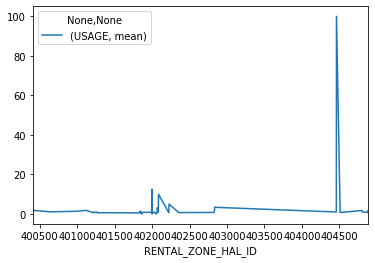

In [101]:
availbility_data2.groupby(['RENTAL_ZONE_HAL_ID']).agg({'USAGE': ['mean']}).plot()